In [450]:
import numpy as np
import time as dt
import matplotlib.pyplot as plt

In [451]:
def conver_time(timestr):
    timestr = timestr.decode("utf-8") 
    ts,ms = timestr.split('.')
    timest = dt.strptime(ts, '%Y-%m-%d %H:%M:%S')
    return int(1000*dt.mktime(timest) + int(ms))#+10800)+int(ms))
vconv_time = np.vectorize(conver_time)

In [452]:
def feature_scaling(x):
    x_loc = x #.reshape(x.size,1)
    return np.asarray((x_loc-np.mean(x_loc))/np.std(x_loc), dtype=float)

In [421]:
data = np.loadtxt('data-train.csv', delimiter=',', skiprows=1, converters={1:conver_time})
#x = np.array((data[['ID', 'Timestamp', 'Location']]))
x = data[:,:data.shape[1]-1].copy()
n = x.shape[1]
#x[:,1] = vconv_time(x[:,1])
x[:,0] = feature_scaling(x[:,0])
x[:,1] = feature_scaling(x[:,1])
x[:,2] = feature_scaling(x[:,2])
x = np.append(np.ones((m,1), float),x,axis=1)
y = np.array(data[:,data.shape[1]-1], int)
m = y.size
y = y.reshape(m,1)
theta_init = np.zeros((n+1,1))

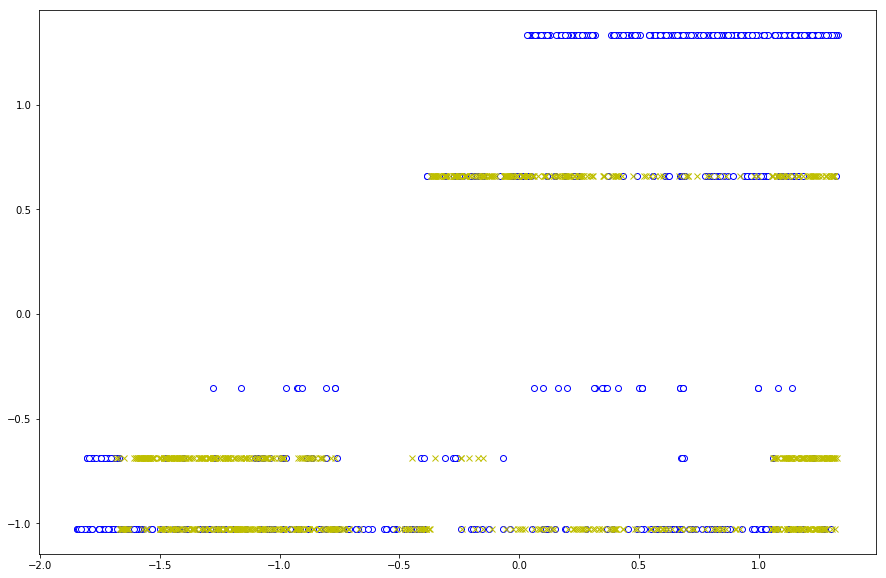

In [457]:
fig = plt.figure(figsize=[15,10])
sample_size = 800
plt.plot(x[np.where(y[:,0]==0)[0],2][:sample_size], x[np.where(y[:,0]==0)[0],3][:sample_size], 'wo', markeredgecolor='b')
plt.plot(x[np.where(y[:,0]==1)[0],2][:sample_size], x[np.where(y[:,0]==1)[0],3][:sample_size], 'yx')
plt.show()

In [438]:
np.where(y[:,0]==1)[0].shape

(130999,)

In [279]:
def sigmoid_function(x, theta):
    theta_loc = theta.reshape(theta.size,1)
    return (1+np.e**-(x.dot(theta_loc)))**-1

def cost_function(x,y,theta,lmbd):
    m = y.size
    n = theta.size
    y_loc = y.reshape(m,1)
    return (lmbd/2*(theta[1:].T.dot(theta[1:])).sum() - (y_loc*np.log(sigmoid_function(x, theta))).sum() - ((1-y_loc)*np.log(1e-10 + 1 - sigmoid_function(x, theta))).sum())/m

def grad_function(x,y,theta,lmbd):
    m = y.size
    n = theta.size
    y_loc = y.reshape(m,1)
    grad = (x.T.dot(sigmoid_function(x,theta) - y) + lmbd*np.append(0,theta[1:].flatten()).reshape(n,1))/m
    return grad

In [337]:
print('Cost @ initital theta = {}'.format(cost_function(x,y,theta_init,0)))
print('Grad @ initital theta = {}'.format(grad_function(x,y,theta_init,0)))

Cost @ initital theta = 0.6931471804388154
Grad @ initital theta = [[ 0.10564919]
 [ 0.0970041 ]
 [ 0.11027046]
 [ 0.19489609]]


In [338]:
def grad_descent(cost_func, grad_func, x, y, theta_init, alpha, lmbd, epsilon, max_iters=1500):
    n = theta_init.size
    theta = theta_init.reshape(n,1)
    p_cost = cost_func(x,y,theta,lmbd) + epsilon
    for i in range(max_iters):
        c_cost = cost_function(x,y,theta,lmbd)
        if c_cost > p_cost - epsilon:
            print('Convergence @ theta = {}'.format(theta))
            print('Cost function value = {}'.format(c_cost))
            return theta
        grad = grad_function(x,y,theta,lmbd)
        theta = theta - alpha*grad
        
    print('Failed to converge')
    print('Current theta = {}'.format(theta))
    print('Cost function value = {}'.format(c_cost))
    return theta    

In [378]:
theta_rslt = grad_descent(cost_function, grad_function, x, y, theta_init, 1, 10, 1e-20, max_iters=5000)

Failed to converge
Current theta = [[-0.53290658]
 [ 0.70338346]
 [-0.70282094]
 [-0.88336285]]
Cost function value = 0.5848673601131027


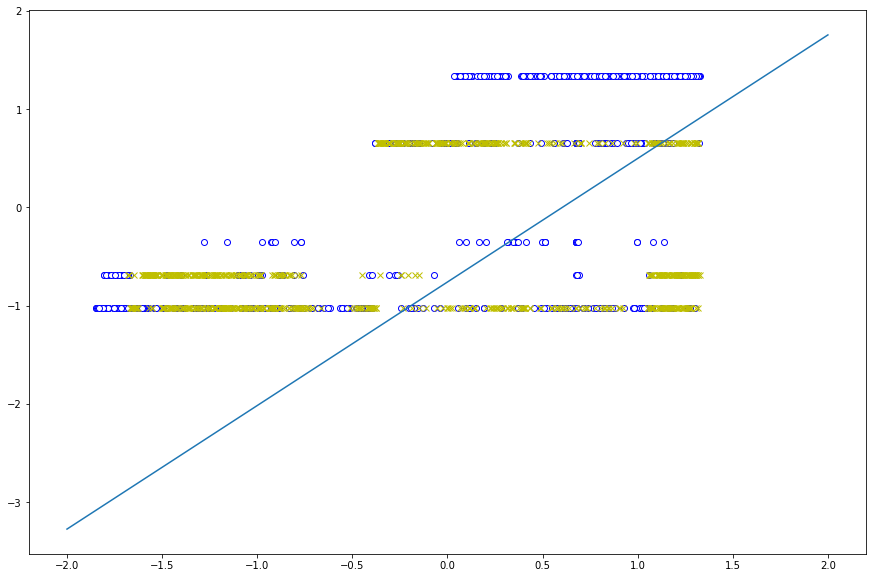

In [459]:
fig = plt.figure(figsize=[15,10])
sample_size = 800
plt.plot(x[np.where(y[:,0]==0)[0],2][:sample_size], x[np.where(y[:,0]==0)[0],3][:sample_size], 'wo', markeredgecolor='b')
plt.plot(x[np.where(y[:,0]==1)[0],2][:sample_size], x[np.where(y[:,0]==1)[0],3][:sample_size], 'yx')
plt.plot(np.linspace(-2,2,100), (np.linspace(-2,2,100)*-.8834--.534)/-.7028)
plt.show()

In [322]:
def predict(x,theta):
#    theta_loc = theta.reshape(theta.size,1)
    return np.array(sigmoid_function(x,theta) > .5, int)

In [385]:
data_test = np.loadtxt('data-test.csv', delimiter=',', skiprows=1, converters={2:conver_time})
x_test = data_test.copy()
m_test = x_test.shape[0]
x_test[:,0] = feature_scaling(x_test[:,0])
x_test[:,1] = feature_scaling(x_test[:,1])
x_test[:,2] = feature_scaling(x_test[:,2])
x_test = np.append(np.ones((m,1), float),x_test,axis=1)
theta_test = theta_rslt.copy()
bfr = theta_test[2].copy()
theta_test[2] = theta_test[3].copy()
theta_test[3] = bfr.copy()
#y_test = np.array(data_test[:,data_test.shape[1]-1], int)
#y_test = y_test.reshape(m_test,1)

In [ ]:
prd = predict(x_test, theta_test)
submit_sample = np.asarray(np.append(data_test[:,0].reshape(m_test,1), prd, axis=1), dtype=int)
np.savetxt('submission.csv', submit_sample, delimiter=',', fmt='%d', header='ID,Category', comments='')